In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Dataset/Advertising.csv'
data = pd.read_csv(path)
data

In [ ]:
data.drop('Unnamed: 0',axis=1)


In [36]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
data1=data.values

In [14]:
#Cắt data
x,y = data1[:,1],data1[:,-1]
print(x)
print(y)

[37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6  2.1  2.6  5.8 24.  35.1  7.6
 32.9 47.7 36.6 39.6 20.5 23.9 27.7  5.1 15.9 16.9 12.6  3.5 29.3 16.7
 27.1 16.  28.3 17.4  1.5 20.   1.4  4.1 43.8 49.4 26.7 37.7 22.3 33.4
 27.7  8.4 25.7 22.5  9.9 41.5 15.8 11.7  3.1  9.6 41.7 46.2 28.8 49.4
 28.1 19.2 49.6 29.5  2.  42.7 15.5 29.6 42.8  9.3 24.6 14.5 27.5 43.9
 30.6 14.3 33.   5.7 24.6 43.7  1.6 28.5 29.9  7.7 26.7  4.1 20.3 44.5
 43.  18.4 27.5 40.6 25.5 47.8  4.9  1.5 33.5 36.5 14.  31.6  3.5 21.
 42.3 41.7  4.3 36.3 10.1 17.2 34.3 46.4 11.   0.3  0.4 26.9  8.2 38.
 15.4 20.6 46.8 35.  14.3  0.8 36.9 16.  26.8 21.7  2.4 34.6 32.3 11.8
 38.9  0.  49.  12.  39.6  2.9 27.2 33.5 38.6 47.  39.  28.9 25.9 43.9
 17.  35.4 33.2  5.7 14.8  1.9  7.3 49.  40.3 25.8 13.9  8.4 23.3 39.7
 21.1 11.6 43.5  1.3 36.9 18.4 18.1 35.8 18.1 36.8 14.7  3.4 37.6  5.2
 23.6 10.6 11.6 20.9 20.1  7.1  3.4 48.9 30.2  7.8  2.3 10.   2.6  5.4
  5.7 43.  21.3 45.1  2.1 28.7 13.9 12.1 41.1 10.8  4.1 42.  35.6  3.7
  4.9  9

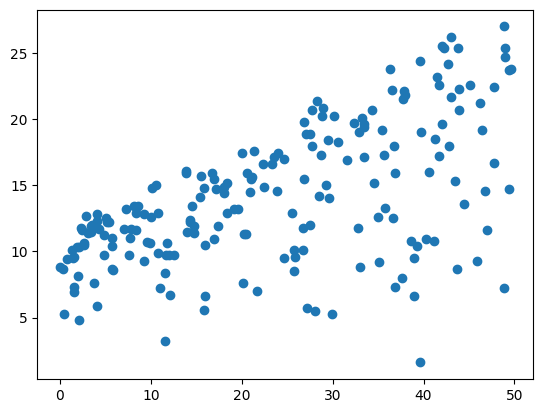

In [15]:
plt.scatter(x,y)
plt.show()

In [16]:
# x là radio
#Hàm dự đoán
def predict (x,weight,bias):
  return weight*x+bias

In [17]:
#hàm phương sai
def cost_function(x,y,weight,bias):
  n=len(x)
  sum_erro = 0
  for i in range(n):
      sum_erro +=(y[i]-(weight*x[i]+bias))**2

      return sum_erro/n



In [19]:
#cập nhập lại weighht
def update_weight(x,y,weight,bias,leaning_rate):
  n = len(x)
  weight_temp = 0.0
  bias_temp=0.0
  for i in range(n):
    weight_temp += -2 *x[i] *(y[i]-(x[i]*weight+bias))
    bias_temp += -2 *y[i] *(x[i]-(x[i]*weight+bias))

  weight -=(weight_temp/n)*leaning_rate
  bias -=(bias_temp/n)*leaning_rate
  return weight,bias

In [28]:
def train (x,y,weight,bias,leaning_rate,iter):
  cost_arr = []
  for i in range(iter):
    weight,bias= update_weight(x,y,weight,bias,leaning_rate)
    cost = cost_function(x,y,weight,bias)
    cost_arr.append(cost)

  return weight,bias,cost_arr




In [29]:
weight,bias,cost = train(x,y,0.03,0.0014,0.001,30)
print('ket qua')
print(weight)
print(bias)
print(cost)


ket qua
0.16938229666048274
10.60417193623415
[0.1828187544275064, 0.38149369341611766, 0.00310238680126813, 0.13523780907148683, 0.0418002656638874, 0.08977729621054804, 0.06462082953793115, 0.08134650979682709, 0.07541720461887448, 0.08215096881699453, 0.08196778597034149, 0.08564189406895713, 0.08722261523280504, 0.08998793126637189, 0.09212958748229308, 0.09464321962994884, 0.09697956852327062, 0.09944051667418176, 0.10185917821335842, 0.10432680848455807, 0.10679255703646233, 0.1092837995075364, 0.1117848717934222, 0.11430379816904432, 0.11683558031623165, 0.11938239009129138, 0.1219424644752168, 0.12451621156040316, 0.12710285369367894, 0.12970227249956773]


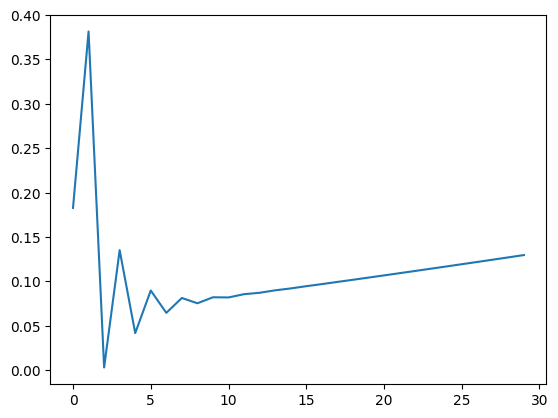

In [31]:
solanlap = [i for i in range(30)]
plt.plot(solanlap,cost)
plt.show()

In [42]:
print(predict (45.9	,weight,bias))

print(predict (45.9	,weight,bias))

18.37881935295031
17.37881935295031
